# K-Nearest Neighbour on Telecommuncation Company Dataset

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

### Here's an visualization of the K-Nearest Neighbors algorithm.
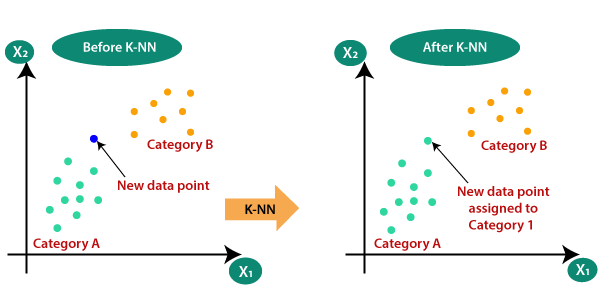

## About the dataset

Dataset used: https://www.kaggle.com/code/zohaib123/telecusts-prediction-k-nearest-neighbors

Consider a scenario where a telecommunications provider has divided its customer base into four distinct groups based on their service usage patterns. If demographic information can assist in forecasting which group a customer belongs to, the company can tailor its offers to individual prospective customers. Essentially, this is a classification problem wherein, given a dataset with predefined labels, we aim to construct a model capable of predicting the category of a new or unfamiliar case.

In this particular case, the emphasis is on utilizing demographic details such as geographical location, age, and marital status to forecast usage patterns. The target field in our dataset contains four potential values, each corresponding to one of the four customer groups:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our primary goal revolves around developing a classifier that can predict the class of unknown cases. To achieve this, we will employ a specific classification technique known as K nearest neighbor (KNN).

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_style('darkgrid')
%matplotlib inline

## Loading the dataset

In [7]:
tele = pd.read_csv(r"../MachineLearns/data/teleCust1000t.csv")
display(tele.head(),tele.tail(),tele.sample(5))

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
333,1,20,37,0,5,46.0,3,10,0.0,1,4,4
883,2,23,31,0,10,45.0,4,0,0.0,0,2,2
270,2,39,25,0,4,18.0,1,0,0.0,1,1,3
731,1,8,42,1,2,129.0,4,17,0.0,1,3,1
828,3,23,25,1,2,28.0,3,1,0.0,1,5,2


## Data Exploration

In [8]:
# checking the shape of the dataset
tele.shape

(1000, 12)

This dataset has `1000` rows and `12` columns

In [9]:
tele.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


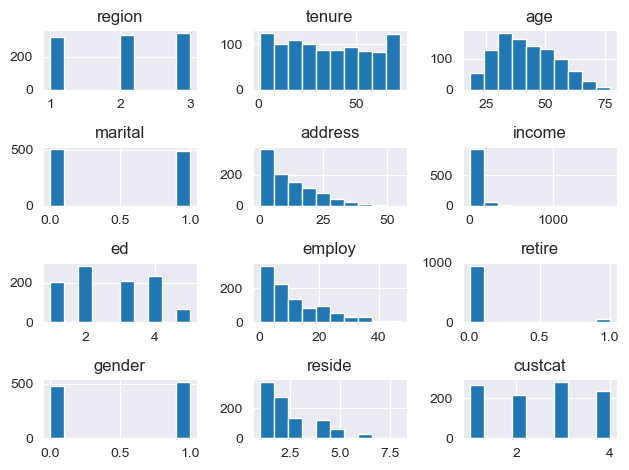

In [11]:
tele.hist()
plt.tight_layout()
plt.show()

## Data Cleaning

In [12]:
# checking null values
tele.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

There are no missing values in the data

## Data Visualisation and Analysis

In [13]:
tele['custcat'].value_counts(sort = True)

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

Here we have
- Plus Service - 281
- Basic Service - 266
- Total Service - 236
- E-Service - 217

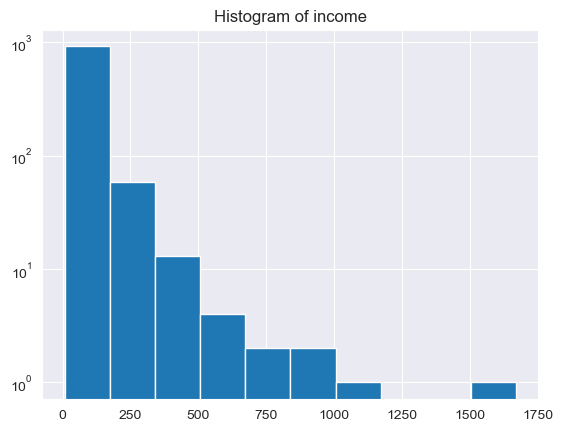

In [18]:
tele.hist(column = 'income')
plt.yscale('log')
plt.title("Histogram of income")
plt.show()

## Defining Feature set

In [42]:
tele.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Turing them into Numpy arrays

Features

In [19]:
x = tele[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
x[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


Labels

In [20]:
y = tele['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Train Test Split

Out of Sample Accuracy is all about how well our model predicts things it hasn't seen before. Imagine you have a robot friend that's really good at recognizing different types of fruits. If you only show it apples during its training, it might get really good at recognizing apples but not so great at other fruits like bananas or oranges.

So, we want our robot friend to be good at recognizing all fruits, not just apples. To do this, we need to test it with fruits it has never seen before. This is similar to how we want our model to make accurate predictions on data it wasn't trained on.

To make sure our robot friend (or model) is good at recognizing all fruits, we use something called the Train/Test Split method. It's like giving the robot a mix of different fruits to practice on. Some are apples (the training set), and some are other fruits (the testing set). The robot learns from the apples but is then tested on the other fruits it hasn't seen during training.

This way, we can be more confident that our robot friend (or model) is good at recognizing all kinds of fruits, not just apples. It's important because in the real world, we often need our models to work on things they haven't seen before, just like our robot friend needs to recognize new fruits.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Normalize Data
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [22]:
x_train_norm = preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))
x_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

# Classification

## K Nearest Neighbour (KNN)

In [23]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

## Training 
Let's take K = 4

In [24]:
k = 4
# training and predicting
nei = KNeighborsClassifier(n_neighbors= k).fit(x_train_norm, y_train)
nei

KNeighborsClassifier(n_neighbors=4)

In [25]:
x_test_norm = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))
x_test_norm[0:5]

array([[-1.13100942, -0.93533648, -0.93817795,  1.02020406, -0.36233308,
         0.17102716, -0.58336825,  0.00666863, -0.21707238, -1.13967126,
         1.97590703],
       [-1.13100942, -1.44823286, -0.13972863, -0.98019606,  0.03474427,
        -0.50017376, -0.58336825, -0.56492821, -0.21707238, -1.13967126,
        -0.90337462],
       [-1.13100942, -0.51569399,  1.53701494,  1.02020406, -0.56087175,
         0.45499678,  0.9619781 , -0.75546048, -0.21707238,  0.87744601,
         1.25608662],
       [-1.13100942, -0.74882871, -0.85833302,  1.02020406, -1.15648777,
        -0.70669712,  0.9619781 , -0.85072662, -0.21707238, -1.13967126,
         0.53626621],
       [-1.13100942,  0.51009876, -1.01802288,  1.02020406, -0.75941043,
         0.17102716,  1.73465128, -0.75546048, -0.21707238, -1.13967126,
         1.25608662]])

## Predicting

In [26]:
y_pred = nei.predict(x_test_norm)
y_pred

array([3, 1, 3, 2, 4, 3, 4, 4, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 4, 1, 3, 4,
       1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 1, 1,
       2, 1, 3, 1, 4, 4, 2, 1, 2, 3, 2, 3, 4, 3, 1, 1, 1, 4, 4, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 1, 2, 2, 3, 3, 1, 2, 1, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 3, 4, 1, 3, 1, 1, 3, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 3, 2, 2, 1, 1, 3, 4, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 1,
       2, 3, 3, 3, 3, 1, 2, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 4, 4, 4, 1, 3, 1, 3, 1, 1, 4,
       3, 3], dtype=int64)

## Accuracy Evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [27]:
from sklearn import metrics

In [28]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, nei.predict(x_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.5475
Test set Accuracy:  0.33


## Trying out other K's

In [29]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    nei = KNeighborsClassifier(n_neighbors = n).fit(x_train_norm,y_train)
    y_pred= nei.predict(x_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred ==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.32 , 0.315, 0.335, 0.33 , 0.34 , 0.335, 0.35 , 0.34 , 0.335])

### Plotting the accuracy of different number of k's

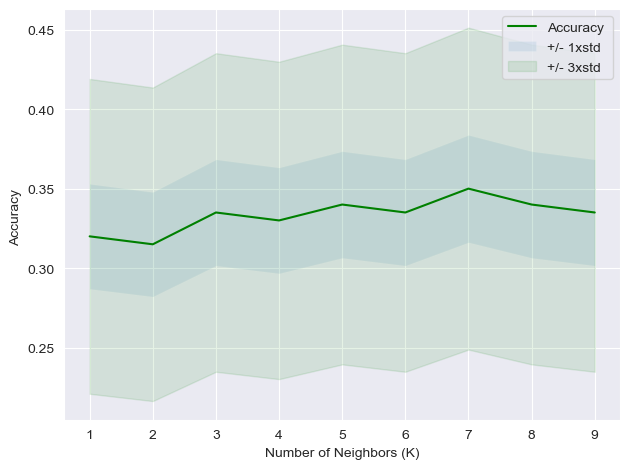

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k= 7


<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyedasif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>